In [1]:
from torchvision import datasets as dt, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

trainset = dt.MNIST(root='./dataset', train=True,
                    download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=6,
                        shuffle=True, num_workers=2)

testset = dt.MNIST(root='./dataset', train=False,
                   download=True, transform=transform)

testloader = DataLoader(testset, batch_size=6,
                        shuffle=False, num_workers=2)

In [2]:
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([6, 1, 28, 28])

In [3]:
def plotImages(samples, ground_truth, nb):
    if len(samples) != len(ground_truth) or nb > len(ground_truth):
        print("Cannot display the image(s) - please verify your parameters...")
        return
        
    fig = plt.figure()
    for i in range(nb):
        plt.subplot(nb+1%4,4,i+1)
        plt.tight_layout()
        plt.imshow(samples[i][0], cmap='gray', interpolation='none')
        plt.title(f"Ground Truth: {ground_truth[i]}")
        plt.xticks([])
        plt.yticks([])
    

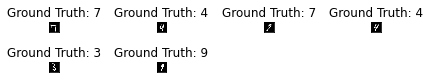

In [4]:
plotImages(example_data,example_targets , 6)

In [5]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [6]:
import NNUtils as nu

model = Net()
loss_func = F.cross_entropy
opt = nu.getSGDOptim(model, 0.01)

In [7]:
nu.fit(2, model, loss_func, opt, trainloader, testloader)

<ipython-input-5-fe54d3ae7723>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.382666
Train Epoch: 0 [6/60000 (0%)]	Loss: 2.239137
Train Epoch: 0 [12/60000 (0%)]	Loss: 2.329505
Train Epoch: 0 [18/60000 (0%)]	Loss: 2.251265
Train Epoch: 0 [24/60000 (0%)]	Loss: 2.286442
Train Epoch: 0 [30/60000 (0%)]	Loss: 2.242925
Train Epoch: 0 [36/60000 (0%)]	Loss: 2.226831
Train Epoch: 0 [42/60000 (0%)]	Loss: 2.261125
Train Epoch: 0 [48/60000 (0%)]	Loss: 2.323354
Train Epoch: 0 [54/60000 (0%)]	Loss: 2.214096
Train Epoch: 0 [60/60000 (0%)]	Loss: 2.453062
Train Epoch: 0 [66/60000 (0%)]	Loss: 2.426199
Train Epoch: 0 [72/60000 (0%)]	Loss: 2.228068
Train Epoch: 0 [78/60000 (0%)]	Loss: 2.349819
Train Epoch: 0 [84/60000 (0%)]	Loss: 2.339958
Train Epoch: 0 [90/60000 (0%)]	Loss: 2.237699
Train Epoch: 0 [96/60000 (0%)]	Loss: 2.318792
Train Epoch: 0 [102/60000 (0%)]	Loss: 2.281746
Train Epoch: 0 [108/60000 (0%)]	Loss: 2.267133
Train Epoch: 0 [114/60000 (0%)]	Loss: 2.330251
Train Epoch: 0 [120/60000 (0%)]	Loss: 2.244206
Train Epoch: 0 [126/60000 (0%)]	

In [8]:
nu.test(model, loss_func, testloader)

<ipython-input-5-fe54d3ae7723>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0105, Accuracy: 9799/10000         (98%)

